In [1]:
setwd('C:/Users/bki19/OneDrive/deskto/Linear_Regression/data')

In [2]:
df<-read.csv('./Tool_Life.csv')

In [3]:
colnames(df)<-c('y','x','Type')

# Indicator Variable

In [4]:
df2<-df
df2[,'Type']<-ifelse(df[,'Type']=='A',0,1)

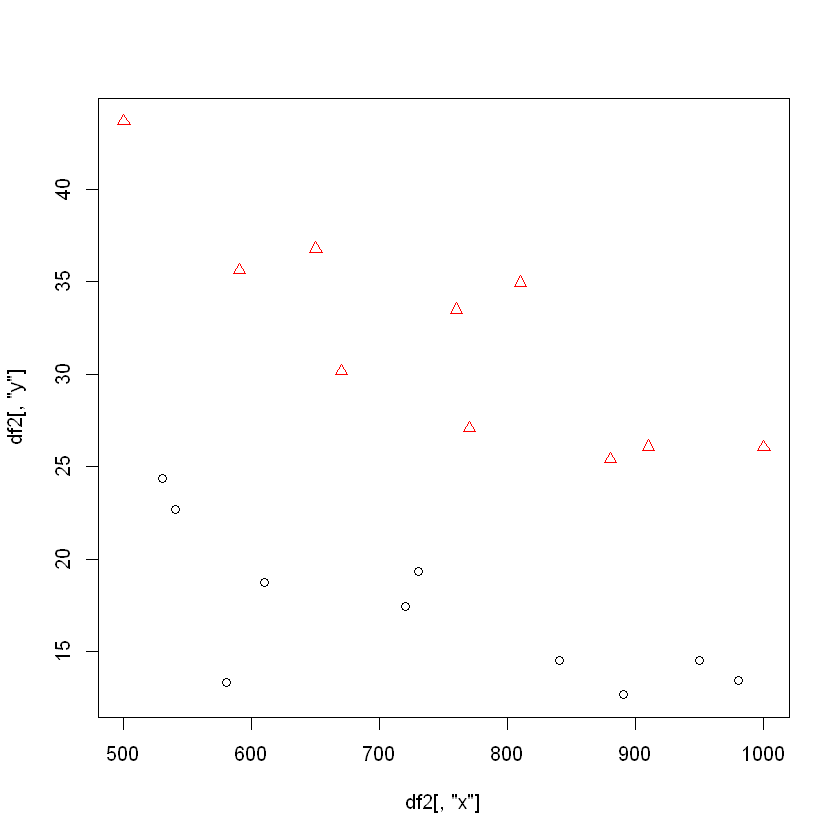

In [5]:
plot(df2[,'x'],df2[,'y'],pch=(df2[,'Type']+1),col=(df2[,'Type']+1) )

검정이 A, 빨강이 B로 카테고리별로 선형성이 보임

In [6]:
fit<-lm(y~.,data=df2)

In [7]:
summary(fit)


Call:
lm(formula = y ~ ., data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6255 -1.6308  0.0612  2.2218  5.5044 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.208726   3.738882   9.417 3.71e-08 ***
x           -0.024557   0.004865  -5.048 9.92e-05 ***
Type        15.235474   1.501220  10.149 1.25e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.352 on 17 degrees of freedom
Multiple R-squared:  0.8787,	Adjusted R-squared:  0.8645 
F-statistic:  61.6 on 2 and 17 DF,  p-value: 1.627e-08


F test에 대한 p-value가 매우 낮은 걸로 보아 모형은 유의하고, T test로 계수들을 보면 모두 유의하여 모든 regressor 들이 모형에 기여<br>
B2의 회귀계수가 유의한것으로 보아, typeA에서 typeB로 바꾸는 것은 평균 tool life를 증가 시키는 것이 95% 정도로 확신

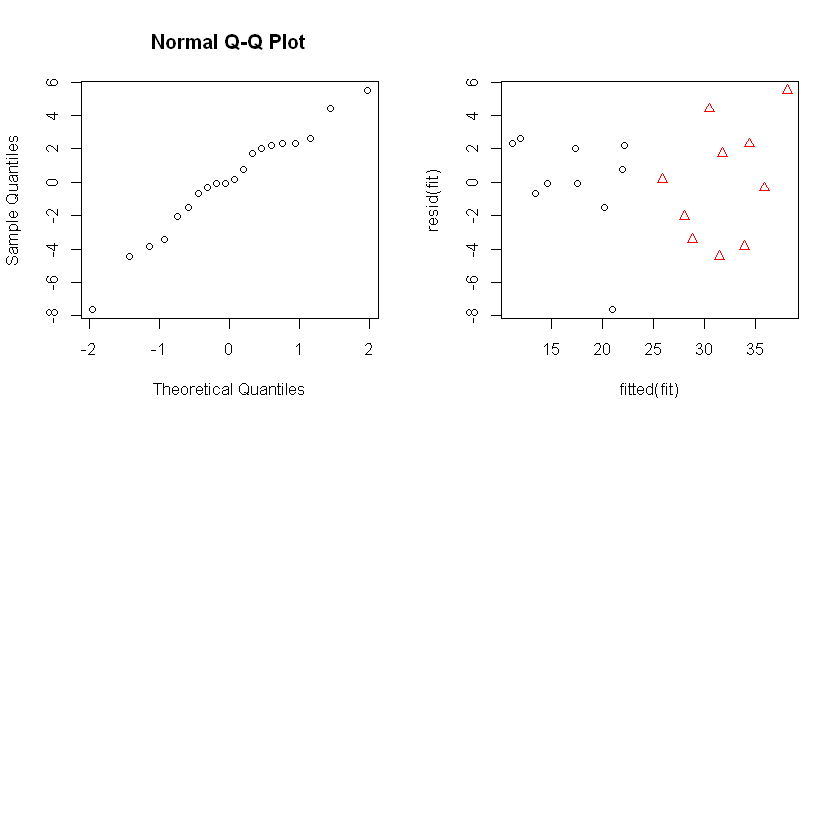

In [8]:
par(mfrow=c(2,2))
qqnorm(resid(fit)) 
plot(fitted(fit),resid(fit) ,pch=(df2[,'Type']+1),col=(df2[,'Type']+1)  )

Normality 봤을 때 거의 normal<br>
Residual plot 봤을 때 error의 constant variance가 두 집단이 달라 보임<br>
->Inequality of Constant variance problem 존재 가능성<br>
두 집단 마다 다른 직선을 적합시키면 어떨까? 이 방법은 두 개의 결과가 나온 다는 점과 두 데이터를 합쳐야 되는 당위성을 잃기 때문에 선호 되지 않음<br>
또한 error의 variance에 대해 두 가지 추정량이 존재하고 자유도를 더 잃음


In [9]:
fit2<-lm(y~x+x*Type,data=df2)

Interaction term 추가<br>
y=b0+b1*x1+b2*Type+b3*x1*Type<br>
Type=0 ; y=b0+b1*x1<br>
Type=1 ; y=b0+b2+(b1+b3)*x1<br>
-> b3만큼 기울기 차이 발생:<br>
<br>
사실상 두 개의 다른 모형을 사용하는 것이기 떄문에 extra-sum-of square로 검정<br>
H0:b2=b3=0<br>


In [10]:
summary(fit2)


Call:
lm(formula = y ~ x + x * Type, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5534 -1.7088  0.3283  2.0913  4.8652 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.176013   4.724895   6.387 9.01e-06 ***
x           -0.017729   0.006262  -2.831  0.01204 *  
Type        26.569340   7.115681   3.734  0.00181 ** 
x:Type      -0.015186   0.009338  -1.626  0.12345    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.201 on 16 degrees of freedom
Multiple R-squared:  0.8959,	Adjusted R-squared:  0.8764 
F-statistic: 45.92 on 3 and 16 DF,  p-value: 4.37e-08


In [11]:
anova(lm(y~x,data=df2),fit2)
anova(fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
18,1348.056,NA,NA,NA,NA
16,163.893,2,1184.163,57.80173,4.773332e-08


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,227.03260,227.03260,22.163977,2.370008e-04
Type,1,1157.07580,1157.07580,112.959117,1.169088e-08
x:Type,1,27.08675,27.08675,2.644334,1.234509e-01
Residuals,16,163.89304,10.24331,NA,NA


F0은 57로 H0 기각 ; b2와 b3는 같지 않음 <br>
둘이 서로 다른 constant 갖고 있는지 보기위해서는 H0:b3=0 <br>
F0=2.64로 기각 못함 ; 두 절편은 같음 / t-test로 봐도 interaction term b3가 유의하지 않음